## Sanju Mathew - Project on Supervised Learning

### Objective - The classification goal is to predict the likelihood of a liability customer buying personal loans.
### Step 1 - Read the column description and ensure you understand each attribute well.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", color_codes=True)
sns.set_palette("Set1")
%matplotlib inline

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.rename(columns = {'ZIP Code' : 'ZIP_Code', 'CCAvg' : 'CC_Avg', 'Personal Loan':'Personal_Loan', 'Securities Account' : 'Securities_Account', 'CD Account':'CD_Account', 'CreditCard' : 'Credit_Card'}, inplace=True) 
df.head()

ID  Age  Experience  Income  ZIP_Code  Family  CC_Avg  Education  Mortgage  \
0   1   25           1      49     91107       4     1.6          1         0   
1   2   45          19      34     90089       3     1.5          1         0   
2   3   39          15      11     94720       1     1.0          1         0   
3   4   35           9     100     94112       1     2.7          2         0   
4   5   35           8      45     91330       4     1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  Credit_Card  
0              0                   1           0       0            0  
1              0                   1           0       0            0  
2              0                   0           0       0            0  
3              0                   0           0       0            0  
4              0                   0           0       0            1

In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null int64
CC_Avg                5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
Credit_Card           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.isna().apply(pd.value_counts)

ID   Age  Experience  Income  ZIP_Code  Family  CC_Avg  Education  \
False  5000  5000        5000    5000      5000    5000    5000       5000   

       Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
False      5000           5000                5000        5000    5000   

       Credit_Card  
False         5000

- Data has 5000 entries with 14 variables.
- It appears to be complete without any null values.
- All the variable values are either integers or continuous numbers.

### Step 2 -Study the data distribution in each attribute, share your findings.

In [6]:
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP_Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CC_Avg              5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809     0.0      0.00   
CD_Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
Credit_Card         5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP_Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CC_Avg                  1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
Credit_Card             0.0      1.00      1.0

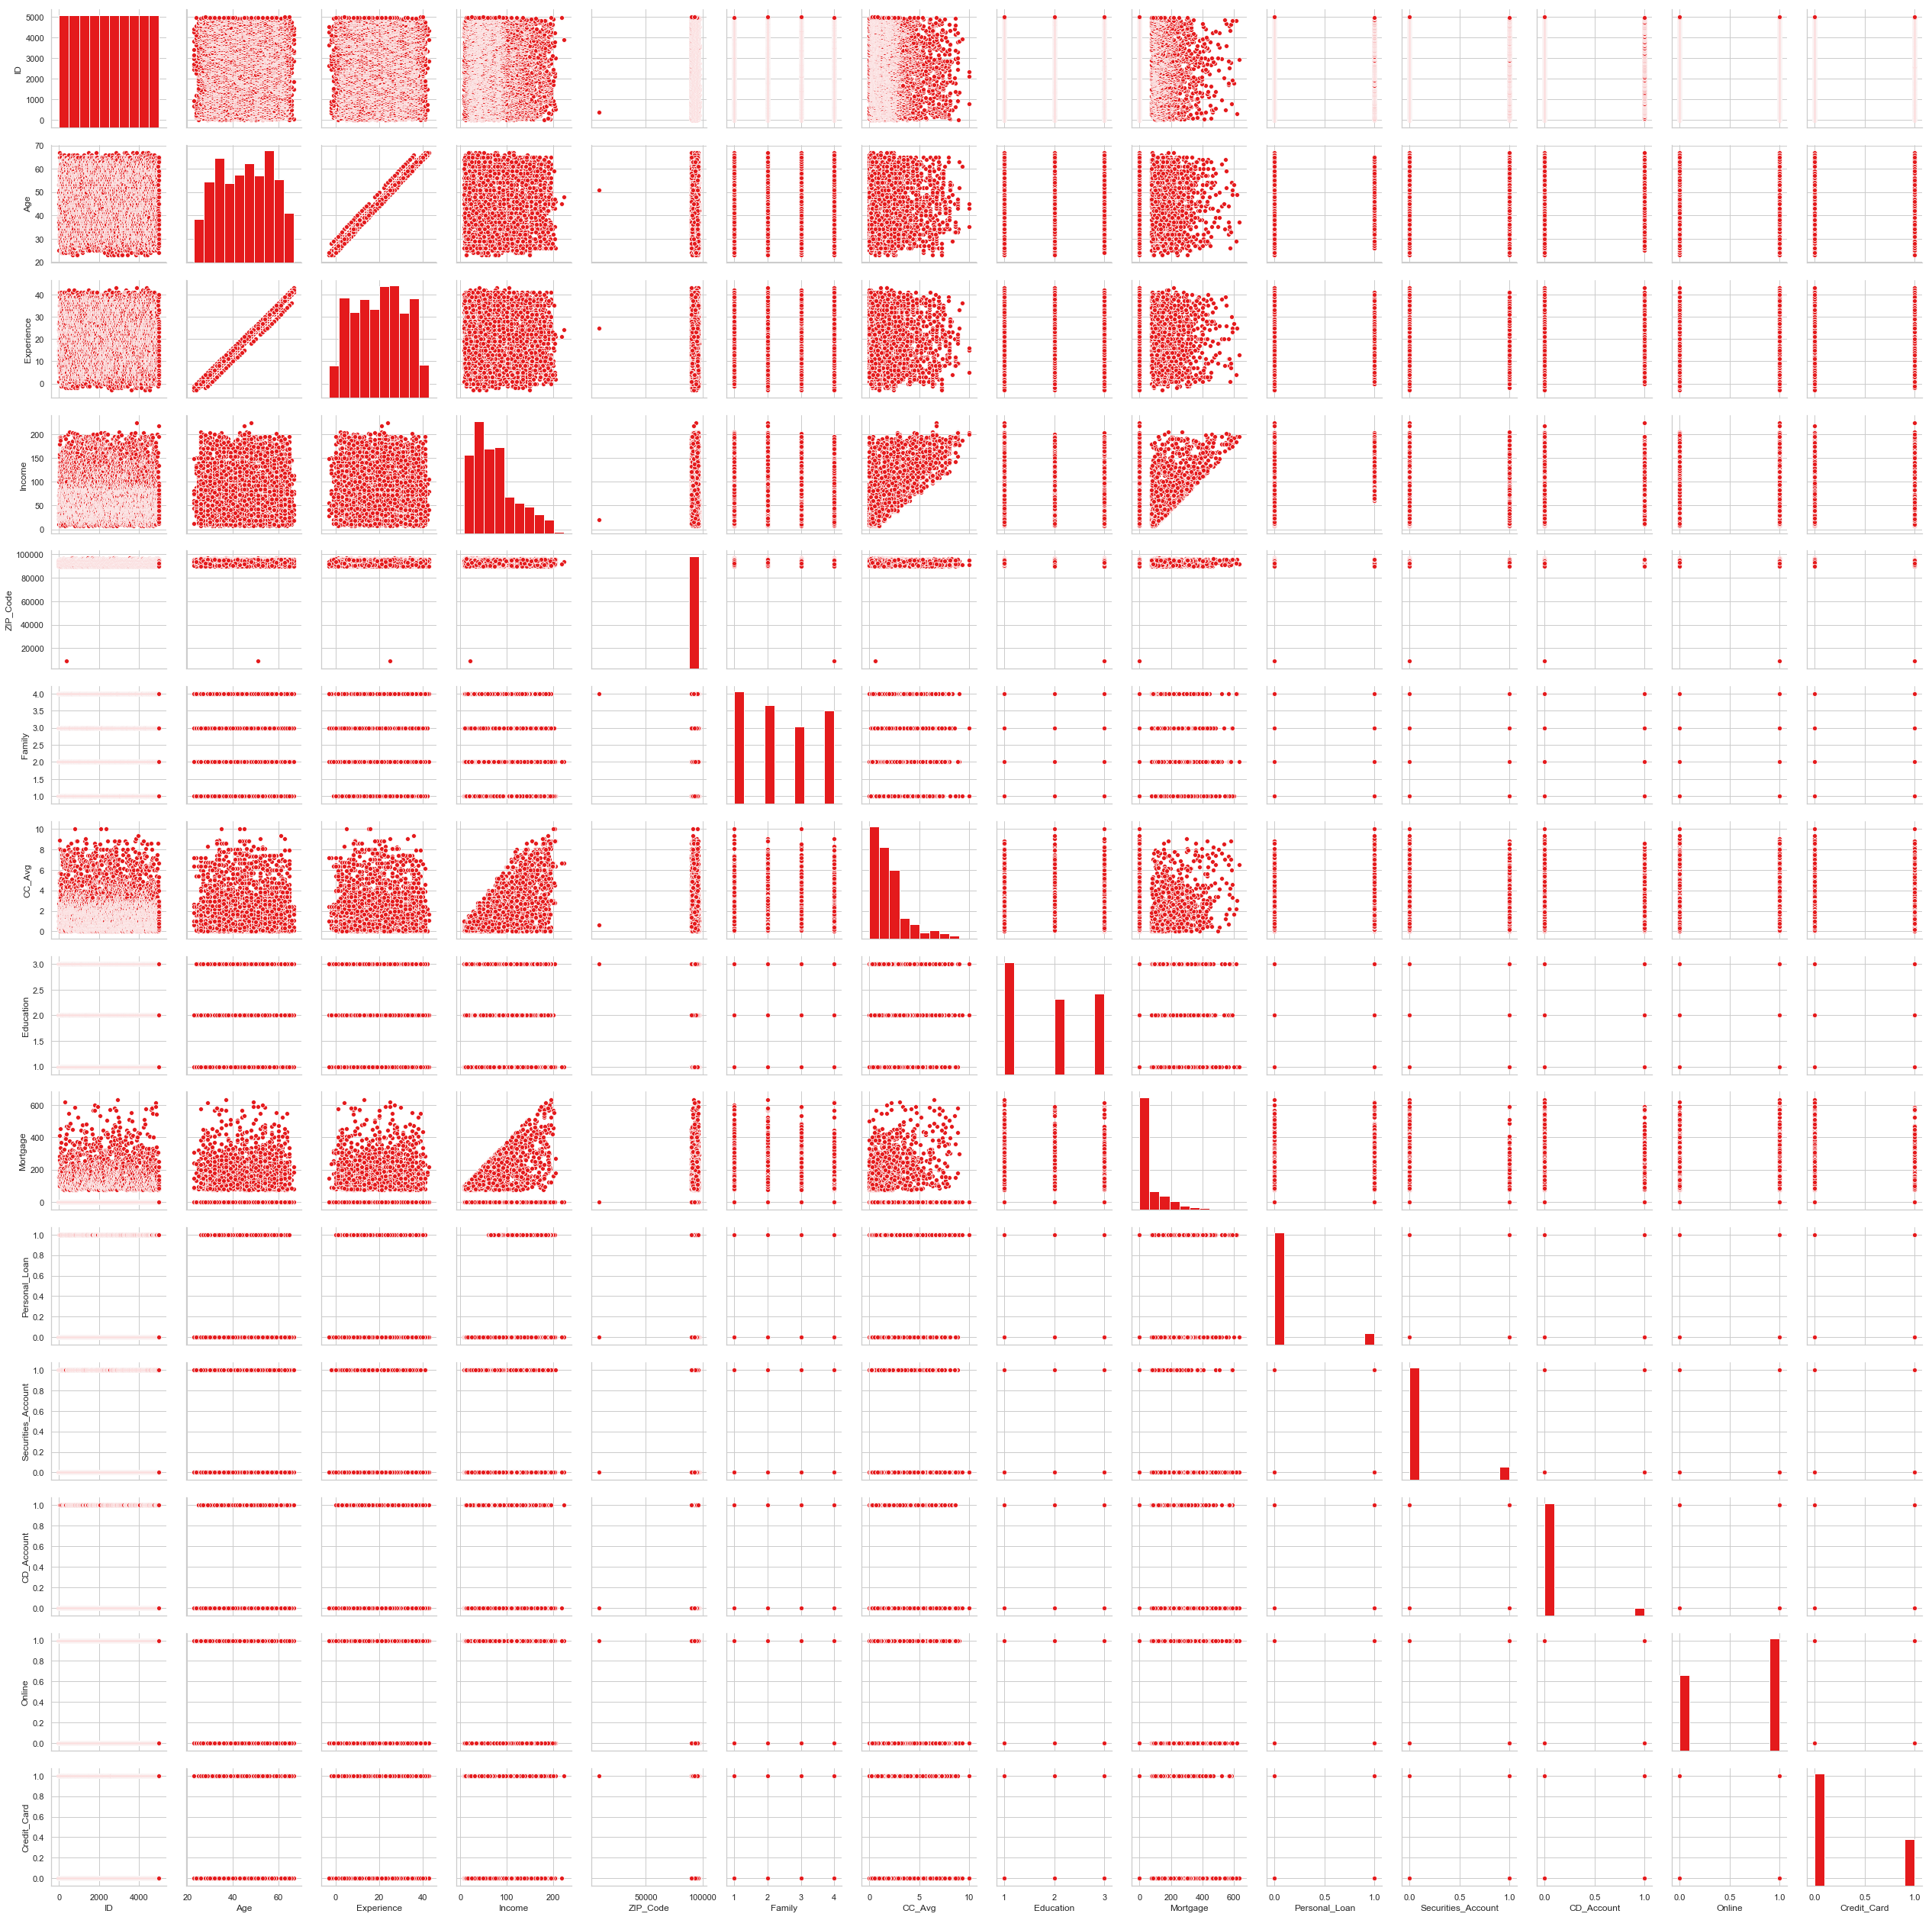

In [7]:
sns.pairplot(df)

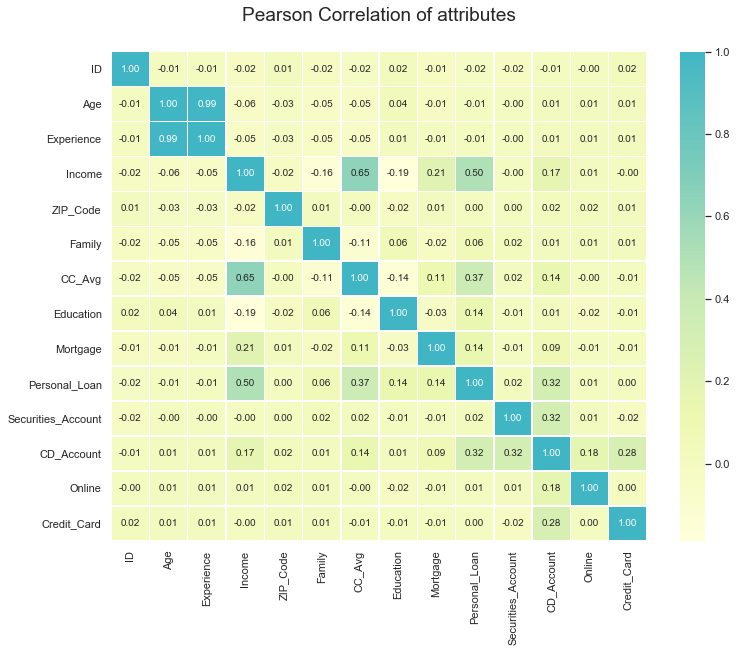

In [8]:
corr = df.corr()
plt.figure(figsize=(12, 9))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=.5, fmt= '.2f', center = 1)

#### Initial study of data ####
- ID: This is customer ID with the bank starting from 1 to 5000 and will not contribute in any way to predict the likelihood of a liability customer buying personal loans. Hence this ID can be dropped.
- Age: Customer's age, a discrete variable from 23 to 67 years, has a very high Pearson correlation (ρ = 0.99) with the 'Experience' of customer. Hence one of it can be considered as a redundant variable. Majority of the customers are between 34 and 56 years of age.
- Experience: Customers' years of professional experience, also a discrete variable from -3 to 43, has some negative values in data that is logically impossible and in relation to age collecting values for experience from customer can be challenging. Hence Experience can also be dropped.
- Income: Annual income of the customer is right skewed with a range of 8,000 to 2,24,000 dollars. It has relatively better Pearson correlation (ρ = 0.50) with Personal Loan, which states if the customer accepted personal loans in the last campaign. This can be a good predictor of the likelihood of a customer buying personal loans. It indicates majority of the customers earn between 28,000 to 120,000 dollars.
- ZIP_Code: Home Address ZIP code may contribute to this model in cases where data is observed to be concentrated in a locality. Further study is required to understand its importance.
- Family: Family size of the customer, also a discrete variable from 1 to 4, can also be a good indicator of liability along with other parameters.
- CC_Avg: Avg. spending on credit cards per month, is highly right skewed with a range of 0 to 10,000 dollars and mean of 1,937. It has relatively good Pearson correlation (ρ = 0.37) with Personal Loan as well. This can also be a good indicator of liability to the customer and a good predictor of the likelihood of a customer buying personal loans.
- Education: Education Level. 1: Undergrad, 2: Graduate and 3: Advanced/Professional is an ordinal value. Data appears to be indicating that majority of the customers are Undergrads.
- Mortgage: Value of house mortgage if availed by the customer, is highly right skewed with a range of 0 to 6,35,000 dollars. A median of 0 and mean of 56,498 indicates majority of the customers have not availed a house mortgage.
- Personal_Loan: Acceptance of the personal loan offered in the last campaign is a binary categorical variable indicating the customer accepted the personal loan or not. Mean indicating only 9.6% accepted the offer. This can be the target variable. There seems to be a heavy class imbalance in here that might create a biased model. This might have to be studied further.
- Securities_Account: Customer has a securities account with the bank or not is a binary categorical variable. Mean indicating 10.44% has a securities account.
- CD_Account: Customer has a certificate of deposit (CD) account with the bank or not is also a binary categorical variable. Mean indicating 6.04% has a CD account. It has relatively good Pearson correlation (ρ = 0.32) with Personal Loan as well.
- Online: Customer uses internet banking facilities or not is also a binary categorical variable. Mean indicating 59.68% uses internet banking facilities.
- Credit_Card: Customer uses a credit card issued by Universal Bank or not is also a binary categorical variable. Mean indicating 29.4% uses credit card.

#### Distribution of ‘Age’ and ‘Experience’

Distribution of Age


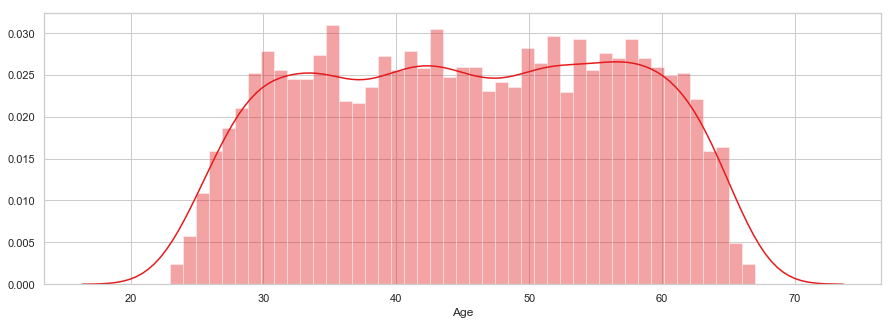

In [9]:
plt.figure(figsize=(15,5))
sns.distplot(df['Age'], bins = df.Age.nunique())
print('Distribution of Age')

- Age of primary beneficiaries distribution appear to be almost flat with standard deviation of 11 with a mean and median of 45.

Negative Experience Count: 52


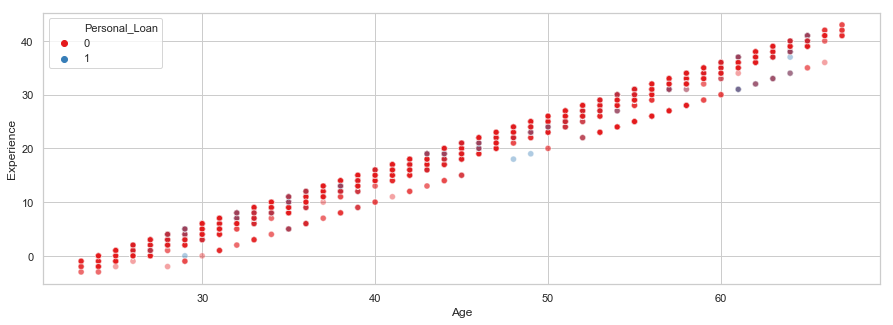

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['Age'], y = df['Experience'], hue = df['Personal_Loan'], alpha = 0.4)
print("Negative Experience Count:", df[df['Experience'] < 0]['Experience'].count())

In [11]:
df.drop(columns= ['ID', 'Experience'], inplace=True) 

- Dropping Experience as it is highly corelated (ρ = 0.99) with Age along with ID as it is customer ID.

#### Relation between ‘Age’, ‘Income’, ‘Family’ and ‘Education’.

Education - 1: Undergrad | 2: Graduate | 3: Advanced/Professional


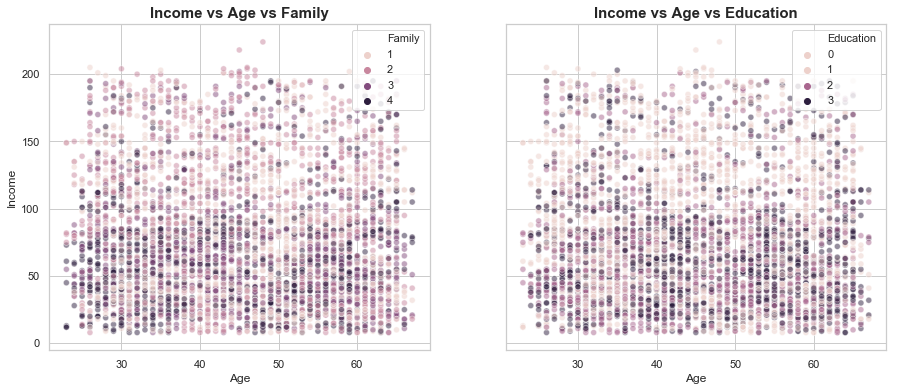

In [12]:
f, ax = plt.subplots(1, 2, sharey = True, figsize = (15,6))
sns.scatterplot(x = df['Age'], y = df['Income'], hue = df['Family'], alpha = 0.5, ax = ax[0])
ax[0].set_title("Income vs Age vs Family", size = 15, weight = "bold")
sns.scatterplot(x = df['Age'], y = df['Income'], hue = df['Education'], alpha = 0.5, ax = ax[1])
ax[1].set_title("Income vs Age vs Education", size = 15, weight = "bold")
print("Education - 1: Undergrad | 2: Graduate | 3: Advanced/Professional")

- Visually also ‘Income’ does not appear to have any relation with ‘Age’, ‘Family’ or ‘Education’ similar to pearson correlation.

#### Relation between ‘ZIP code’, ‘Income’ and ‘Personal Loan’.

In [13]:
df_ZIP_temp = df.copy(deep=True)
df_ZIP_temp[df.index == 384]

Age  Income  ZIP_Code  Family  CC_Avg  Education  Mortgage  \
384   51      21      9307       4     0.6          3         0   

     Personal_Loan  Securities_Account  CD_Account  Online  Credit_Card  
384              0                   0           0       1            1

In [14]:
df_ZIP_temp.drop(index = 384, inplace=True)

- Dropping ZIP code 9307 from visualisation as it is not a valid US zip code.

Checking concentration of Income in ZIP codes and relation to Personal Loan


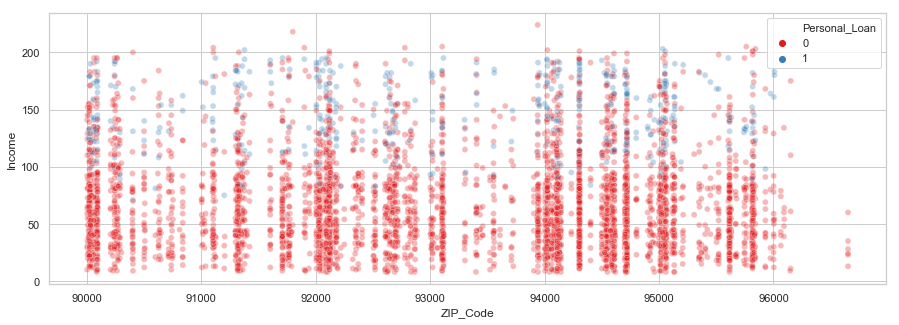

In [15]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = df_ZIP_temp['ZIP_Code'], y = df_ZIP_temp['Income'], hue = df_ZIP_temp['Personal_Loan'], alpha = 0.3)
print("Checking concentration of Income in ZIP codes and relation to Personal Loan")

- It appears to have concentration of customers income in some ZIP codes.

#### Relation between ‘Personal Loan’ and ‘Categorical variables’.

Education - 1: Undergrad | 2: Graduate | 3: Advanced/Professional


CD_Account            0         1    All
Personal_Loan                           
0              0.927629  0.536424  0.904
1              0.072371  0.463576  0.096

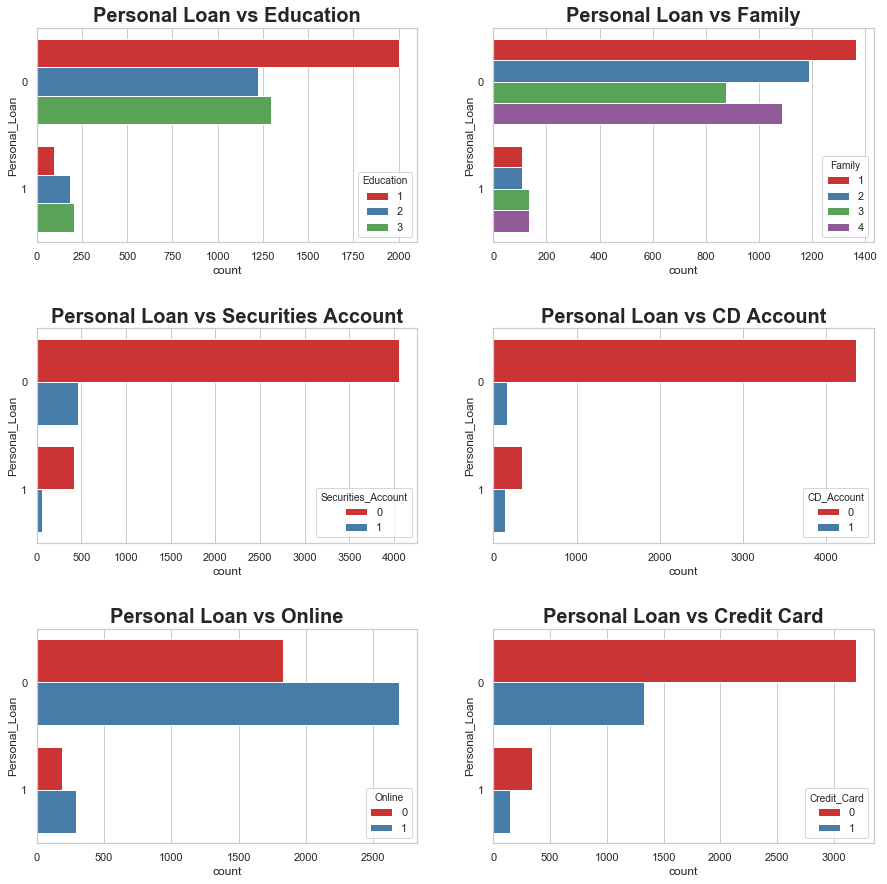

In [16]:
f, ax = plt.subplots(3, 2, figsize = (15,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
sns.countplot(y='Personal_Loan', order = df.Personal_Loan.value_counts().index, hue = 'Education', data=df, ax = ax[0,0])
ax[0,0].set_title("Personal Loan vs Education", size = 20, weight = "bold")
sns.countplot(y='Personal_Loan', order = df.Personal_Loan.value_counts().index, hue = 'Family', data=df, ax = ax[0,1])
ax[0,1].set_title("Personal Loan vs Family", size = 20, weight = "bold")

sns.countplot(y='Personal_Loan', order = df.Personal_Loan.value_counts().index, hue ='Securities_Account', data=df, ax = ax[1,0])
ax[1,0].set_title("Personal Loan vs Securities Account", size = 20, weight = "bold")
sns.countplot(y='Personal_Loan', order = df.Personal_Loan.value_counts().index, hue ='CD_Account', data=df, ax = ax[1,1])
ax[1,1].set_title("Personal Loan vs CD Account", size = 20, weight = "bold")

sns.countplot(y='Personal_Loan', order = df.Personal_Loan.value_counts().index, hue ='Online', data=df, ax = ax[2,0])
ax[2,0].set_title("Personal Loan vs Online", size = 20, weight = "bold")
sns.countplot(y='Personal_Loan', order = df.Personal_Loan.value_counts().index, hue ='Credit_Card', data=df, ax = ax[2,1])
ax[2,1].set_title("Personal Loan vs Credit Card", size = 20, weight = "bold")

print("Education - 1: Undergrad | 2: Graduate | 3: Advanced/Professional")
pd.crosstab(df['Personal_Loan'], df['CD_Account'], normalize = 'columns', margins = True)

- Graduates and Advanced/Professionals are ~8.5% more likely to opt for 'Personal Loan' in comparison to Undergrads.
- Family of 3 prefers 'Personal Loan' by ~3.5% more than average of others.
- CD Account holders are 39% more likely to opt for 'Personal Loan'.
- Rest of the variables like 'Online', 'Credit Card' and 'Securities Account' does not significantly contribute to target variable.
- All 3 of them appear to have similar proportion in relation to 'Personal Loan' takers and non takers.

#### Relation between ‘Personal Loan’, ‘Income’, ‘Mortgage’ and ‘Credit Card Average’.

Distribution of Income


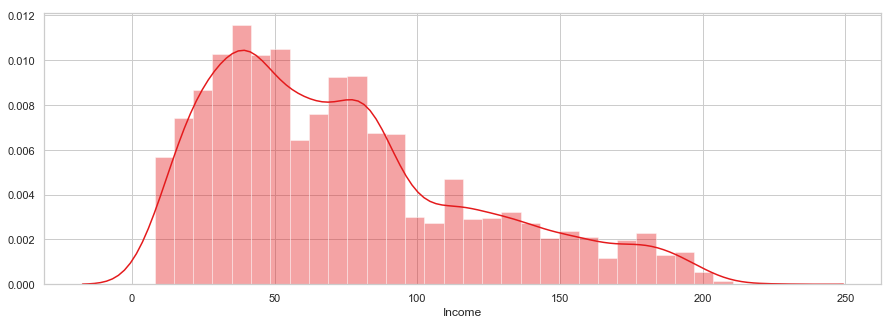

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(df['Income'])
print('Distribution of Income')

- 'Income' data is right skewed with a mean of 74K dollars and median of 64K dollars.

Distribution of Income


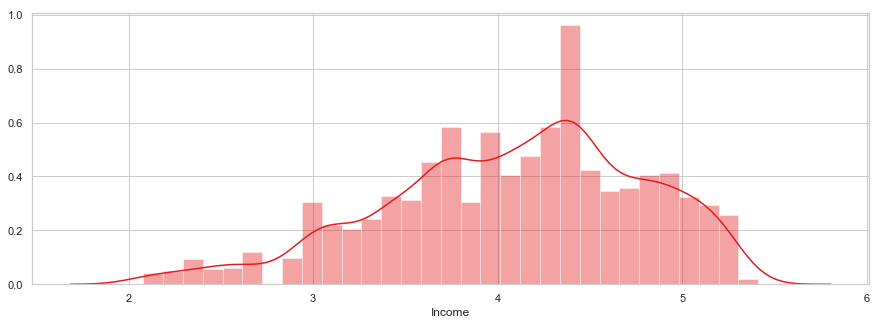

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(df['Income'].apply(np.log))
print('Distribution of Income')

- Applying log scale on 'Income' improved Logistic Regression out of sample recall score by 3% while dropping scores for all other models.
- Since it did not contribute significantly, dataset is considered without log scale throughout this project.

Distribution of Mortgage


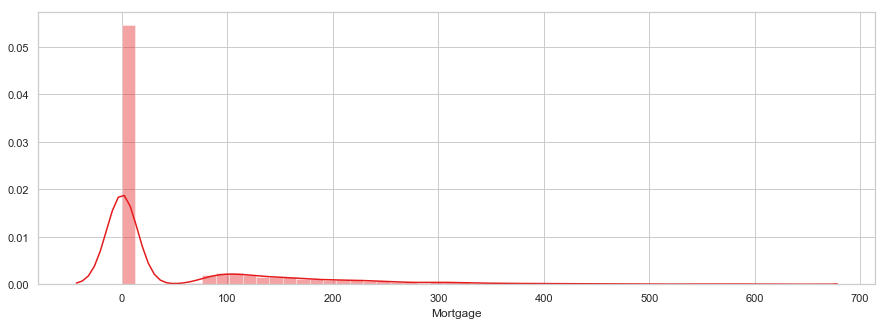

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(df['Mortgage'])
print('Distribution of Mortgage')

- Mortgage has 69% zero values.
- It is logically possible as they may not have taken a mortgage.

Credit Card Average


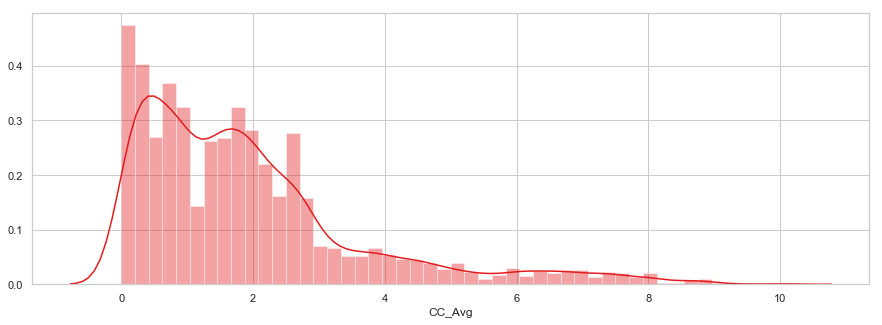

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(df['CC_Avg'])
print('Credit Card Average')

- Credit Card Average is also right skewed data with min and max of 0 and 10K dollars with mean and median being 1.9K and 1.5K dollars respectively.
- Majority of the customers prefers to spend less amount monthly using credit card.

### Step 3 - Get the target column distribution. Your comments.

 Red: Personal loan not accepted in last campaign | Income mean: $ 66237.4  | CC_Avg mean: $ 1729.0 
 Blue: Personal loan accepted in last campaign    | Income mean: $ 144745.8 | CC_Avg mean: $ 3905.4


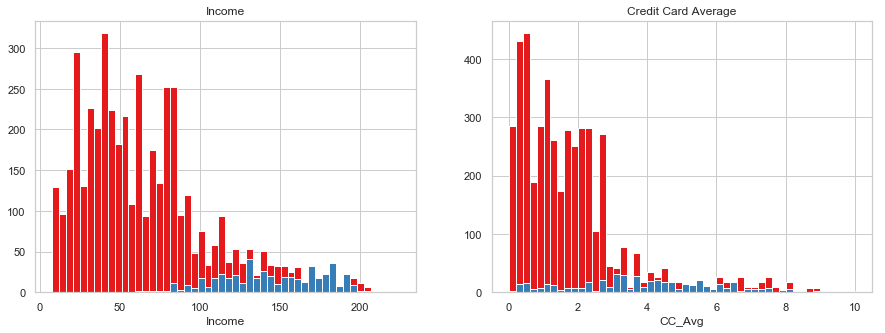

In [21]:
plt.figure(figsize=(15,5))
# subplot 1
plt.subplot(1, 2, 1)
plt.title('Income')
a = df[df.Personal_Loan == 0]['Income']
b = df[df.Personal_Loan == 1]['Income']
bins=np.histogram(np.hstack((a,b)), bins=50)[1]
plt.hist(a, bins)
plt.hist(b, bins)
plt.xlabel('Income')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Credit Card Average')
a = df[df.Personal_Loan == 0]['CC_Avg']
b = df[df.Personal_Loan == 1]['CC_Avg']
bins=np.histogram(np.hstack((a,b)), bins=50)[1]
plt.hist(a, bins)
plt.hist(b, bins)
plt.xlabel('CC_Avg')
print(" Red: Personal loan not accepted in last campaign",
      "| Income mean: $", (round(df[df.Personal_Loan == 0]['Income'].mean(),4))*1000,
      " | CC_Avg mean: $", (round(df[df.Personal_Loan == 0]['CC_Avg'].mean(),4))*1000,
      "\n", "Blue: Personal loan accepted in last campaign   ",
      "| Income mean: $", (round(df[df.Personal_Loan == 1]['Income'].mean(),4))*1000,
      "| CC_Avg mean: $", (round(df[df.Personal_Loan == 1]['CC_Avg'].mean(),4))*1000)

plt.show()

 Red: Personal loan not accepted | Income mean: $ 66237.4  | CC_Avg mean: $ 1729.0 | Mortgage mean: $ 51789.4 
 Blue: Personal loan accepted    | Income mean: $ 144745.8 | CC_Avg mean: $ 3905.4 | Mortgage mean: $ 100845.8


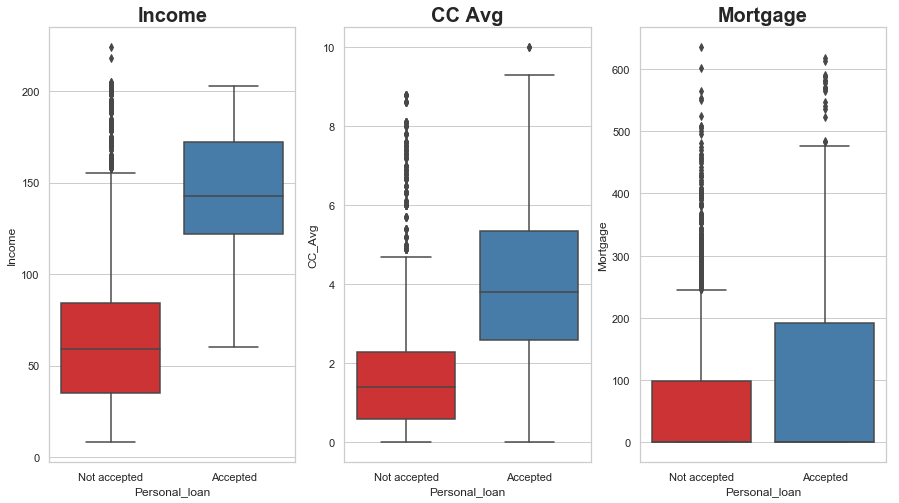

In [22]:
df_Income = pd.DataFrame()
df_Income = df_Income.append(pd.DataFrame({'Personal_loan': 'Not accepted', 'Income':df[df.Personal_Loan == 0]['Income']}))
df_Income = df_Income.append(pd.DataFrame({'Personal_loan': 'Accepted', 'Income':df[df.Personal_Loan == 1]['Income']}))
df_CC_Avg = pd.DataFrame()
df_CC_Avg = df_CC_Avg.append(pd.DataFrame({'Personal_loan': 'Not accepted', 'CC_Avg':df[df.Personal_Loan == 0]['CC_Avg']}))
df_CC_Avg = df_CC_Avg.append(pd.DataFrame({'Personal_loan': 'Accepted', 'CC_Avg':df[df.Personal_Loan == 1]['CC_Avg']}))
df_Mortgage = pd.DataFrame()
df_Mortgage = df_Mortgage.append(pd.DataFrame({'Personal_loan': 'Not accepted', 'Mortgage':df[df.Personal_Loan == 0]['Mortgage']}))
df_Mortgage = df_Mortgage.append(pd.DataFrame({'Personal_loan': 'Accepted', 'Mortgage':df[df.Personal_Loan == 1]['Mortgage']}))

f, ax = plt.subplots(1, 3, figsize = (15,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
sns.boxplot(y = df_Income.Income, x = df_Income.Personal_loan, orient="v", ax = ax[0])
ax[0].set_title("Income", size = 20, weight = "bold")
sns.boxplot(y = df_CC_Avg.CC_Avg, x = df_CC_Avg.Personal_loan, orient="v", ax = ax[1])
ax[1].set_title("CC Avg", size = 20, weight = "bold")
sns.boxplot(y = df_Mortgage.Mortgage, x = df_Mortgage.Personal_loan, orient="v", ax = ax[2])
ax[2].set_title("Mortgage", size = 20, weight = "bold")

print(" Red: Personal loan not accepted", 
      "| Income mean: $", (round(df[df.Personal_Loan == 0]['Income'].mean(),4))*1000,
      " | CC_Avg mean: $", (round(df[df.Personal_Loan == 0]['CC_Avg'].mean(),4))*1000,
      "| Mortgage mean: $", (round(df[df.Personal_Loan == 0]['Mortgage'].mean(),4))*1000,
      "\n", "Blue: Personal loan accepted   ",
      "| Income mean: $", (round(df[df.Personal_Loan == 1]['Income'].mean(),4))*1000,
      "| CC_Avg mean: $", (round(df[df.Personal_Loan == 1]['CC_Avg'].mean(),4))*1000,
      "| Mortgage mean: $", (round(df[df.Personal_Loan == 1]['Mortgage'].mean(),4))*1000)

Income vs Mortgage vs CC Avg vs Personal_Loan


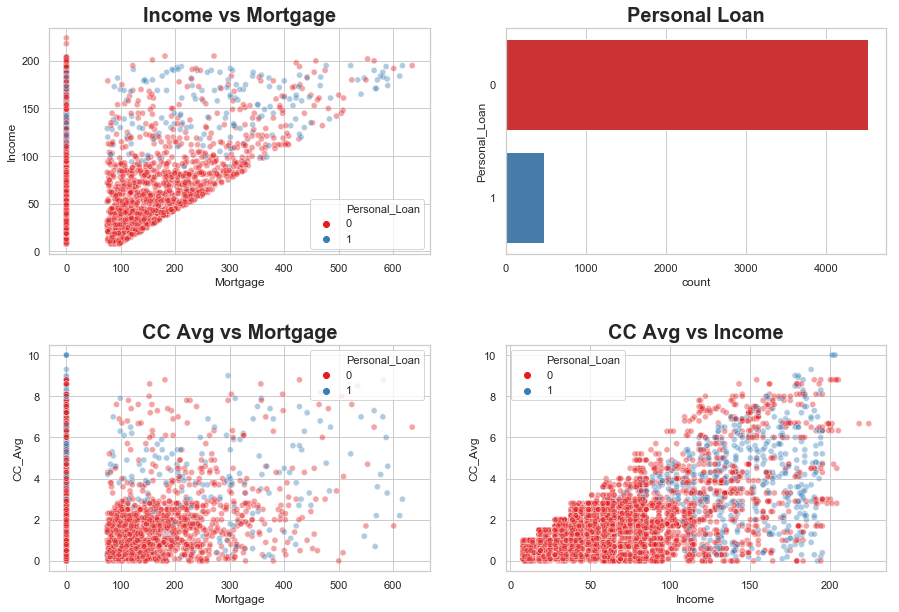

In [23]:
f, ax = plt.subplots(2, 2, figsize = (15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
sns.scatterplot(x = df['Mortgage'], y = df['Income'], hue = df['Personal_Loan'], alpha=0.4,ax = ax[0,0])
ax[0,0].set_title("Income vs Mortgage", size = 20, weight = "bold")
sns.countplot(y='Personal_Loan', data=df,ax = ax[0,1])
ax[0,1].set_title("Personal Loan", size = 20, weight = "bold")
sns.scatterplot(x = df['Mortgage'], y = df['CC_Avg'], hue = df['Personal_Loan'], alpha=0.4,ax = ax[1,0])
ax[1,0].set_title("CC Avg vs Mortgage", size = 20, weight = "bold")
sns.scatterplot(x = df['Income'], y = df['CC_Avg'], hue = df['Personal_Loan'], alpha=0.4,ax = ax[1,1])
ax[1,1].set_title("CC Avg vs Income", size = 20, weight = "bold")
print("Income vs Mortgage vs CC Avg vs Personal_Loan")

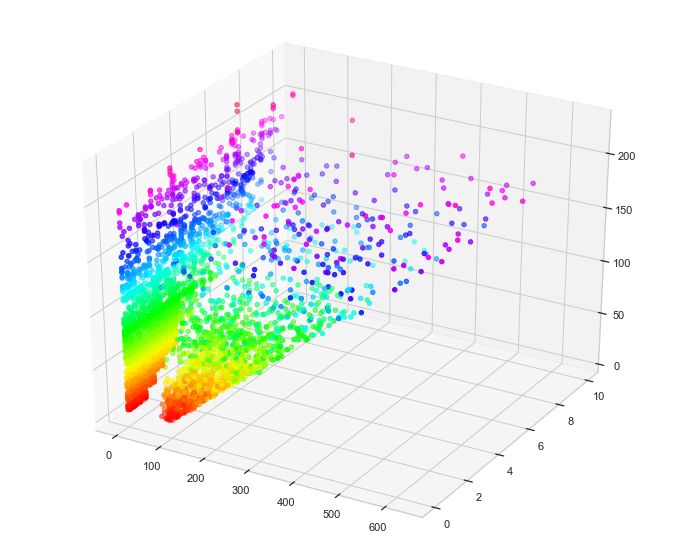

In [24]:
from mpl_toolkits import mplot3d
#%matplotlib notebook

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection="3d")
z_points = df['Income']
x_points = df['Mortgage']
y_points = df['CC_Avg']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')
plt.show()

- 144K dollars appears to be the mean 'Income' of customers who opt for 'Personal Loan'.
- This is significantly more by 78K dollars in comparison to mean 'Income' of customers who did not opt for 'Personal Loan'.
- Similalry 3.9K dollars appears to be the mean 'Monthly average credit card' usage of customers who opt for 'Personal Loan'.
- This is significantly more by 2.2K dollars in comparison to 'Mean monthly average credit card' usage of customers who did not opt for 'Personal Loan'.
- Similalry 100K dollars appears to be the mean 'Mortgage' of customers who opt for 'Personal Loan'.
- This is double in comparison to mean 'Mortgage' of customers who did not opt for 'Personal Loan'.
- Correlation between 'Income' and 'Credit Card Average' as well as 'Income' and 'Mortgage' are both heteroskedastic.
- This can lead to more residual variance as 'Income' increases in linear models.

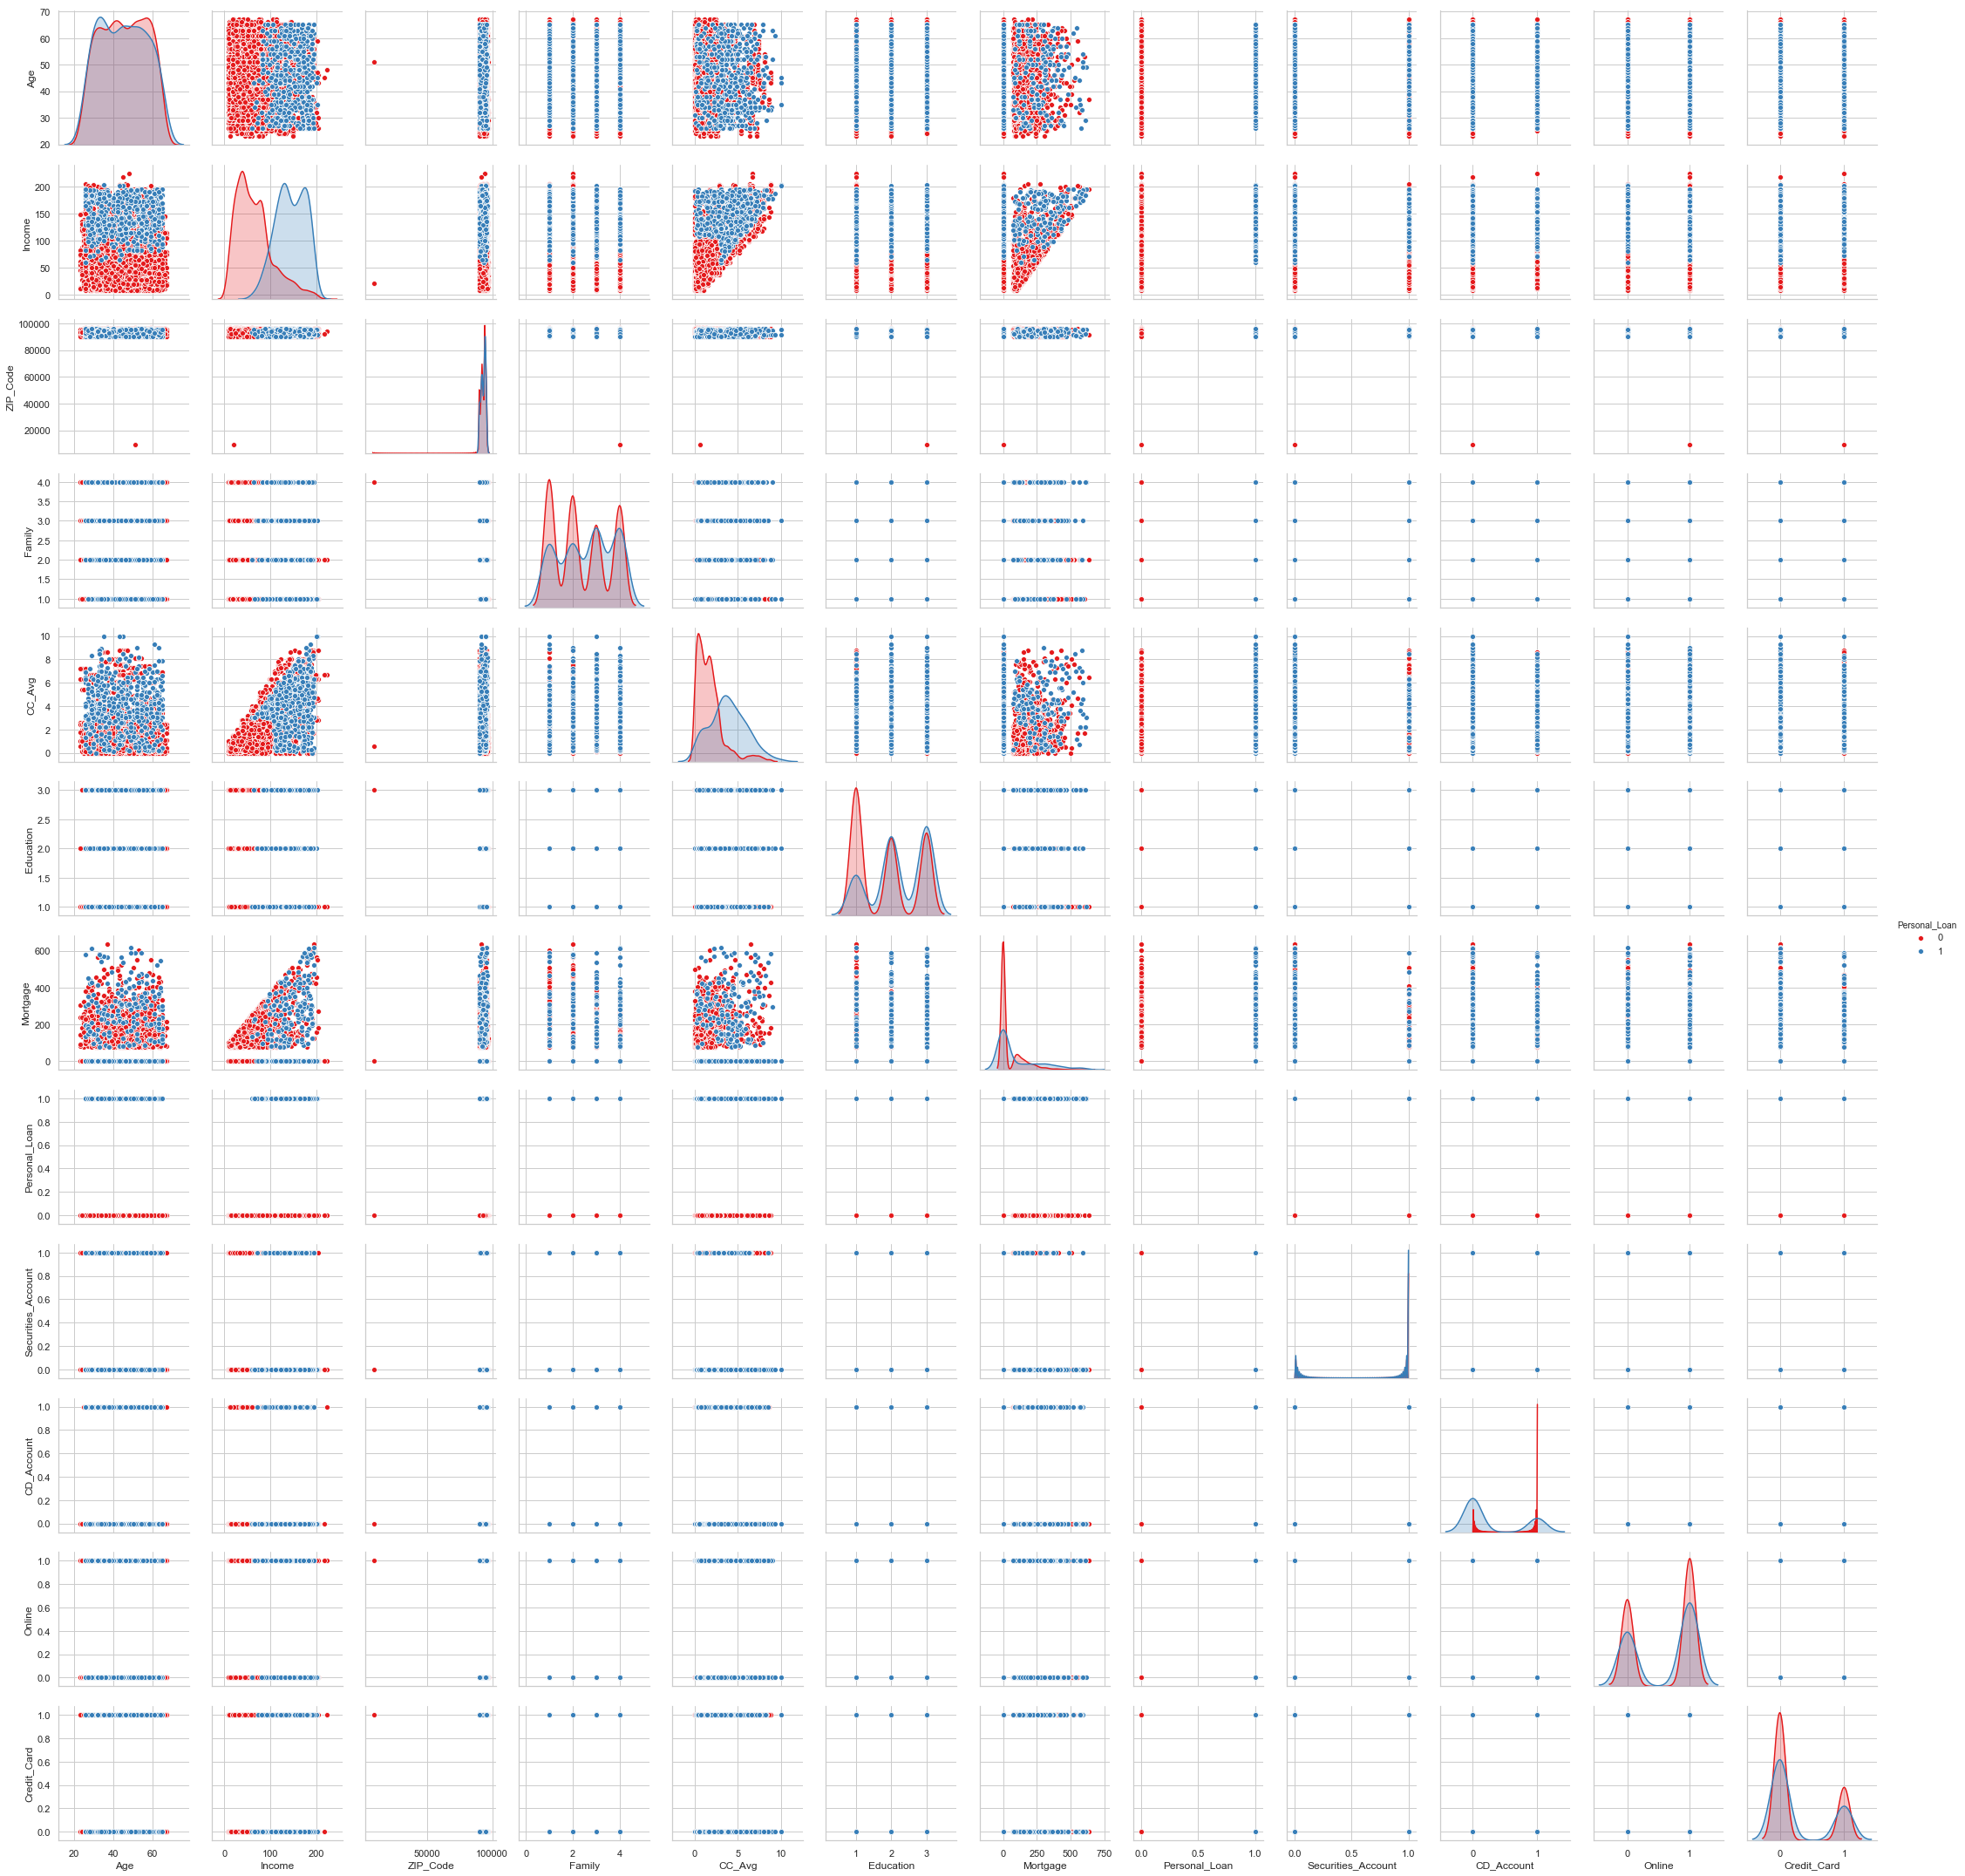

In [25]:
%matplotlib inline
sns.pairplot(df, hue = 'Personal_Loan')

### Step 4 - Split the data into training and test set in the ratio of 70:30 respectively.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score, precision_score

In [27]:
X = df.drop(['Personal_Loan'], axis=1)
y = df[['Personal_Loan']]
X_train, X_test_o, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [28]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test_o)
y_train = np.array(y_train)
y_test = np.array(y_test)

- Data is split into 70:30 ratio for training and testing.
- It has also been normalised by scaling between 0 and 1 to compensate for unit errors.

### Step 5 - Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans.

#### Logistic Regression ###

In [29]:
# Please upgrade scikit-learn to latest version: 0.22.1
# Required for regularization using "elasticnet"; A combination of Ridge Regression and Lasso Regression
# pip install -U scikit-learn
from sklearn.linear_model import LogisticRegression

In [30]:
LR_model = LogisticRegression(solver = "saga", penalty = "elasticnet", l1_ratio = 1, n_jobs = -1)
LR_model.fit(X_train, y_train.ravel())

LR_y_predict_train = LR_model.predict(X_train)
LR_y_predict_test = LR_model.predict(X_test)

print("*** Logistic Regression ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, LR_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, LR_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, LR_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, LR_y_predict_test)))
print(classification_report(y_test, LR_y_predict_test, labels=[1, 0]))

*** Logistic Regression ***
Model Accuracy in-sample: 0.9523
Model Accuracy out of sample: 0.9400
Model Recall in-sample: 0.6314
Model Recall out of sample: 0.6510
              precision    recall  f1-score   support

           1       0.72      0.65      0.68       149
           0       0.96      0.97      0.97      1351

    accuracy                           0.94      1500
   macro avg       0.84      0.81      0.82      1500
weighted avg       0.94      0.94      0.94      1500



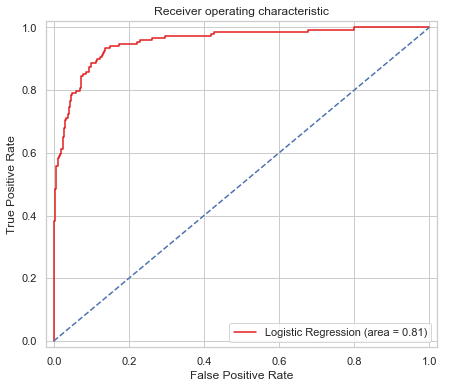

In [31]:
LR_roc_auc = roc_auc_score(y_test, LR_model.predict(X_test))
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(7, 6))
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression (area = %0.2f)' % LR_roc_auc)
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- TP = Actual 1 & Predicted 1 | TN = Actual 0 & Predicted 0 | FP = Actual 0 & Predicted 1 | FN = Actual 1 & Predicted 0
- Bank will lose out on potential customers if FN is high, while it will have to spend extra budget to campaign if FP is high.
- It is more important to measure out of all positives, what fraction was identified.
- Ideally both FN & FP should be least, but in this case we can prefer FN over FP as that will minimise losing out on potential customers.
- This assumption is being considered as the business decision throughout the project.
- Accuracy = ${\dfrac {TP + TN} {TP + TN + FP + FN}}$ | Recall Score or TPR = ${\dfrac {TP} {TP + FN}}$ | FPR = ${\dfrac {FP} {FP + TN}}$ | Precision Score = ${\dfrac {TP} {TP + FP}}$
- Objective is to have higher 'Recall Score' without losing out much on 'Accuracy' or 'Precision Score'.

In [32]:
df_LR_ROC = pd.DataFrame(list(zip(thresholds,LR_fpr,LR_tpr)), columns =['Thresholds','LR_FPR','LR_TPR'])
df_LR_ROC[(df_LR_ROC.LR_TPR > 0.9) & (df_LR_ROC.LR_FPR < 0.15)]

Thresholds    LR_FPR    LR_TPR
86    0.113049  0.123612  0.906040
87    0.109031  0.127313  0.906040
88    0.108892  0.127313  0.912752
89    0.107313  0.130274  0.912752
90    0.107225  0.130274  0.919463
91    0.101441  0.134715  0.919463
92    0.099007  0.134715  0.926174
93    0.097619  0.135455  0.926174
94    0.097378  0.135455  0.932886

- Table shows possible 'Thresholds' to be considered to keep TPR above 0.9

 A)  Accuracy Score:  0.94    | Recall Score:  0.651   | Precision Score:  0.7185 
 B)  Accuracy Score:  0.5247  | Recall Score:  0.9866  | Precision Score:  0.1713 
 C)  Accuracy Score:  0.8707  | Recall Score:  0.9195  | Precision Score:  0.4295


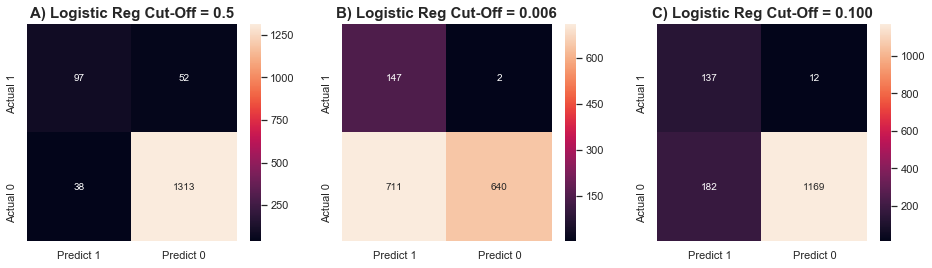

In [33]:
LR_cm =confusion_matrix(y_test, LR_y_predict_test, labels=[1, 0])
LR_df_cm = pd.DataFrame(LR_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

max_thr = np.argmax(LR_fpr*(1-LR_fpr))
Optimal_Threshold = thresholds[max_thr]
LR_y_predict_test_ot = (LR_model.predict_proba(X_test)[:,1] >= Optimal_Threshold)
LR_cm_ot = confusion_matrix(y_test, LR_y_predict_test_ot, labels=[1, 0])
LR_df_cm_ot = pd.DataFrame(LR_cm_ot, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

Threshold = 0.1 # Set threshold
LR_y_predict_test_t = (LR_model.predict_proba(X_test)[:,1] >= Threshold)
LR_cm_t = confusion_matrix(y_test, LR_y_predict_test_t, labels=[1, 0])
LR_df_cm_t = pd.DataFrame(LR_cm_t, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

f, ax = plt.subplots(1, 3, figsize = (16,4))
sns.heatmap(LR_df_cm, annot=True, fmt = 'g', ax = ax[0])
ax[0].set_title("A) Logistic Reg Cut-Off = 0.5", size = 15, weight = "bold")
sns.heatmap(LR_df_cm_ot, annot=True, fmt = 'g', ax = ax[1])
ax[1].set_title("B) Logistic Reg Cut-Off = %0.3f"% Optimal_Threshold, size = 15, weight = "bold")
sns.heatmap(LR_df_cm_t, annot=True, fmt = 'g', ax = ax[2])
ax[2].set_title("C) Logistic Reg Cut-Off = %0.3f"% Threshold, size = 15, weight = "bold")

print(" A) ", "Accuracy Score: ", round(accuracy_score(y_test, LR_y_predict_test), 4), "   | Recall Score: ", round(recall_score(y_test, LR_y_predict_test), 4), "  | Precision Score: ", round(precision_score(y_test, LR_y_predict_test), 4), "\n",
"B) ", "Accuracy Score: ", round(accuracy_score(y_test, LR_y_predict_test_ot), 4), " | Recall Score: ", round(recall_score(y_test, LR_y_predict_test_ot), 4), " | Precision Score: ", round(precision_score(y_test, LR_y_predict_test_ot), 4), "\n",
"C) ", "Accuracy Score: ", round(accuracy_score(y_test, LR_y_predict_test_t),4), " | Recall Score: ", round(recall_score(y_test, LR_y_predict_test_t),4), " | Precision Score: ", round(precision_score(y_test, LR_y_predict_test_t),4))

- Comparing confusion matrix with different threshold values of 0.5, 0.006 (Best Recall) and 0.1 (Optimised).
- Choosing Cut-off of 0.1 as optimum threshold based on good recall score, without losing much of Accuracy and Precision.
- 12 FN out of 149 (8% error) and 182 FP out of 1351 (13.5% error).

#### K-Nearest Neighbors ###

In [34]:
from sklearn.neighbors import KNeighborsClassifier

The optimal number of Neighbours is 5


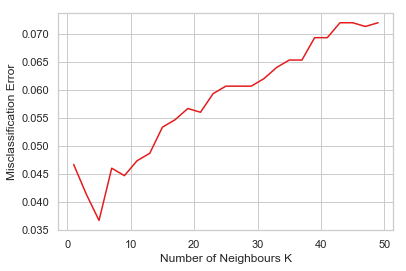

In [35]:
scores =[]
K_lim = 50
for k in range(1,K_lim,2):
    KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'distance', n_jobs = -1)
    KNN_model.fit(X_train, y_train.ravel())
    scores.append(KNN_model.score(X_test, y_test.ravel()))
neighbors = list(range(1, K_lim, 2))
#plt.plot(neighbors, scores)
MSE = [1 - x for x in scores] # changing to misclassification error
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of Neighbours is %d" % optimal_k)

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbours K')
plt.ylabel('Misclassification Error')
plt.show()

- Optimising K with values between 1 and 50 with a step of 2 to identify clear majority.
- K of 1 gives better recall score, but variance is very high during cross validation.
- Hence continuing with K of 5.

In [36]:
KNN_model = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance', n_jobs = -1)
KNN_model.fit(X_train, y_train.ravel())

KNN_y_predict_train = KNN_model.predict(X_train)
KNN_y_predict_test = KNN_model.predict(X_test)

print("*** K-Nearest Neighbours ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, KNN_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, KNN_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, KNN_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, KNN_y_predict_test)))
print(classification_report(y_test, KNN_y_predict_test, labels=[1, 0]))

*** K-Nearest Neighbours ***
Model Accuracy in-sample: 1.0000
Model Accuracy out of sample: 0.9633
Model Recall in-sample: 1.0000
Model Recall out of sample: 0.6510
              precision    recall  f1-score   support

           1       0.97      0.65      0.78       149
           0       0.96      1.00      0.98      1351

    accuracy                           0.96      1500
   macro avg       0.97      0.82      0.88      1500
weighted avg       0.96      0.96      0.96      1500



#### Naive Bayes ###

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 1]), (len(df.loc[df['Personal_Loan'] == 1])/len(df.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 0]), (len(df.loc[df['Personal_Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 480 (9.60%)
Original Target False Values   : 4520 (90.40%)

Training Target True Values    : 331 (9.46%)
Training Target False Values   : 3169 (90.54%)

Test Target True Values        : 149 (9.93%)
Test Target False Values       : 1351 (90.07%)



In [39]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train.ravel())

NB_y_predict_train = NB_model.predict(X_train)
NB_y_predict_test = NB_model.predict(X_test)

print("*** Naive Bayes ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, NB_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, NB_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, NB_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, NB_y_predict_test)))
print(classification_report(y_test, NB_y_predict_test, labels=[1, 0]))

*** Naive Bayes ***
Model Accuracy in-sample: 0.8897
Model Accuracy out of sample: 0.9040
Model Recall in-sample: 0.6012
Model Recall out of sample: 0.0604
              precision    recall  f1-score   support

           1       0.69      0.06      0.11       149
           0       0.91      1.00      0.95      1351

    accuracy                           0.90      1500
   macro avg       0.80      0.53      0.53      1500
weighted avg       0.88      0.90      0.87      1500



- Naive Bayes has very low out of sample 'Recall score' of 0.06 for 1.
- This could be due to class imbalance of 10:90 along with many independent variables.
- Scope for further study.

#### Support Vector Machine ###

In [40]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

In [41]:
SVM_model = svm.SVC() 
grid_values = [{'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['linear']},
              {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]},
              {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0], 'degree':[1,2,3,4,5]},
              {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]}]

Random_model_acc = RandomizedSearchCV(SVM_model, param_distributions = grid_values, n_jobs = -1, scoring='recall')
Random_model_acc.fit(X_train, y_train.ravel())

SVM_y_predict_train = Random_model_acc.predict(X_train)
SVM_y_predict_test = Random_model_acc.predict(X_test)

print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, SVM_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, SVM_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, SVM_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, SVM_y_predict_test)))
Random_model_acc.best_params_

Model Accuracy in-sample: 0.9957
Model Accuracy out of sample: 0.9507
Model Recall in-sample: 0.9577
Model Recall out of sample: 0.6174


{'kernel': 'poly', 'gamma': 0.9, 'degree': 5, 'C': 1.8}

In [42]:
SVM_model = svm.SVC(C = 1.8, degree = 3, gamma = 2.0, kernel = 'poly') # parameters picked after iterations in Random Search
SVM_model.fit(X_train , y_train.ravel())

SVM_y_predict_train = SVM_model.predict(X_train)
SVM_y_predict_test = SVM_model.predict(X_test)

print("*** Support Vector Machine ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, SVM_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, SVM_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, SVM_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, SVM_y_predict_test)))
print(classification_report(y_test, SVM_y_predict_test, labels=[1, 0]))

*** Support Vector Machine ***
Model Accuracy in-sample: 0.9943
Model Accuracy out of sample: 0.9347
Model Recall in-sample: 0.9396
Model Recall out of sample: 0.7919
              precision    recall  f1-score   support

           1       0.64      0.79      0.71       149
           0       0.98      0.95      0.96      1351

    accuracy                           0.93      1500
   macro avg       0.81      0.87      0.83      1500
weighted avg       0.94      0.93      0.94      1500



- Results after optimising parameters of SVM using Randomized Search Cross Validation for better out of sample recall score.

#### DecisionTreeClassifier ####

In [43]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [44]:
DT_model = tree.DecisionTreeClassifier()
grid_values = {'criterion':['gini','entropy'], 'splitter':['best', 'random'], 'max_depth':[1,2,3,4,5,6,7,8,9]}
 
grid_model_acc = GridSearchCV(DT_model, param_grid = grid_values, n_jobs = -1, scoring='recall')
grid_model_acc.fit(X_train, y_train.ravel())

DT_y_predict_train = grid_model_acc.predict(X_train)
DT_y_predict_test = grid_model_acc.predict(X_test)

print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, DT_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, DT_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, DT_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, DT_y_predict_test)))
grid_model_acc.best_estimator_

Model Accuracy in-sample: 0.9889
Model Accuracy out of sample: 0.9747
Model Recall in-sample: 0.9124
Model Recall out of sample: 0.9396


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
DT_model = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
DT_model.fit(X_train, y_train.ravel())

DT_y_predict_train = DT_model.predict(X_train)
DT_y_predict_test = DT_model.predict(X_test)

print("*** Decision Tree Classifier ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, DT_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, DT_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, DT_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, DT_y_predict_test)))
print(classification_report(y_test, DT_y_predict_test, labels=[1, 0]))

*** Decision Tree Classifier ***
Model Accuracy in-sample: 0.9889
Model Accuracy out of sample: 0.9747
Model Recall in-sample: 0.9124
Model Recall out of sample: 0.9396
              precision    recall  f1-score   support

           1       0.83      0.94      0.88       149
           0       0.99      0.98      0.99      1351

    accuracy                           0.97      1500
   macro avg       0.91      0.96      0.93      1500
weighted avg       0.98      0.97      0.98      1500



- Results after optimising parameters of Decision Tree Classifier using Grid Search Cross Validation.

#### Initial Summary
- All models other than Decision Tree Classifier did not produce good out of sample recall score.
- Logistic Regression out of sample recall score: 0.6510 @ cut-off: 0.5 | 0.9195 @ cut-off: 0.1
- K-Nearest Neighbors out of sample recall score: 0.6510
- Naive Bayes out of sample recall score: 0.0604
- Support Vector Machine out of sample recall score: 0.7919
- Decision Tree Classifier out of sample recall score: 0.9396

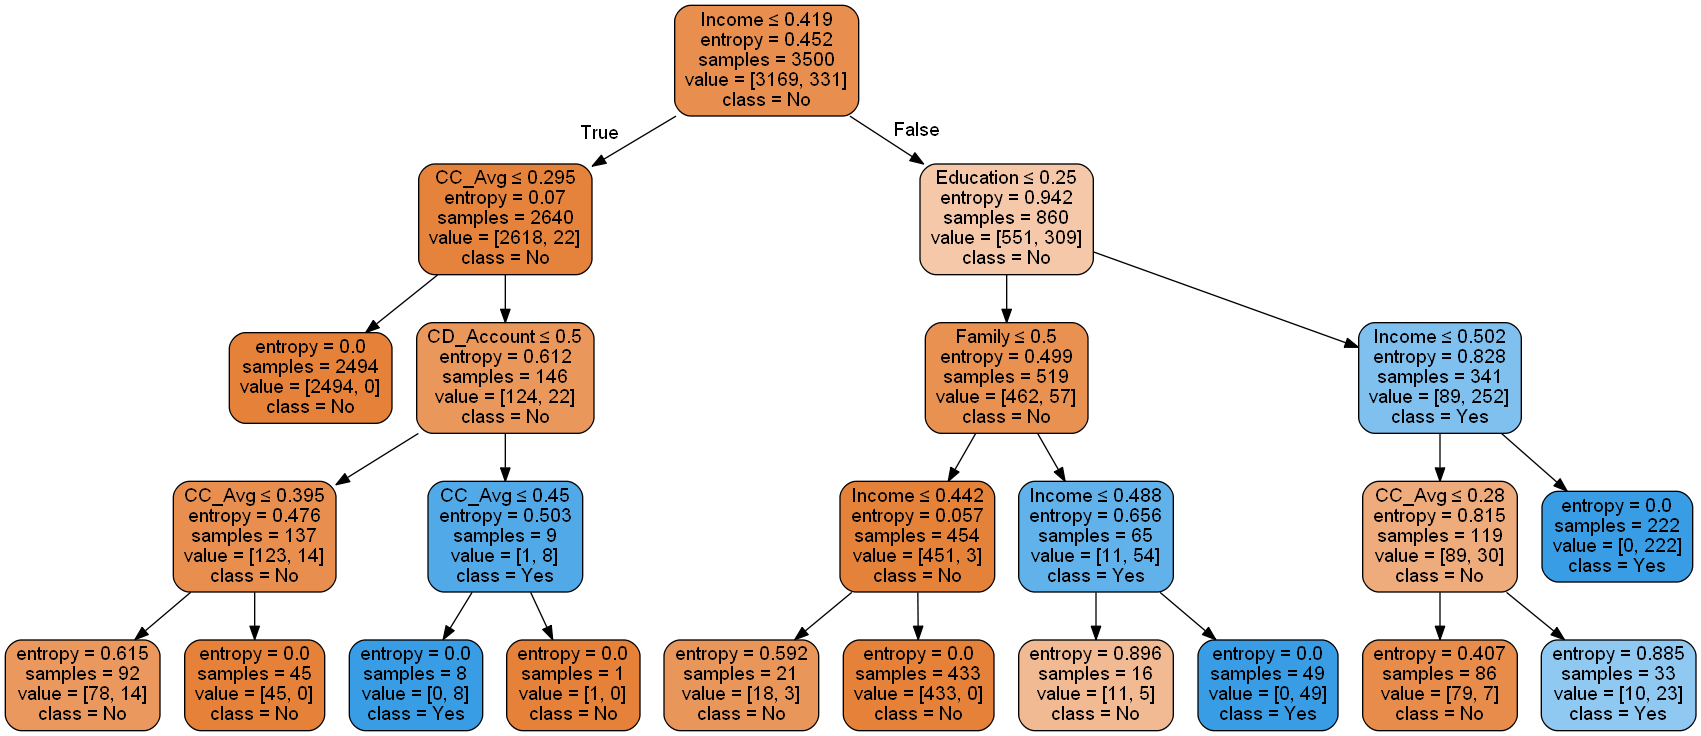

In [46]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
dot_data = StringIO() 
features = ['Age', 'Income', 'ZIP_Code', 'Family', 'CC_Avg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'Credit_Card']
classes = ['No', 'Yes']
tree.export_graphviz(DT_model, out_file=dot_data, feature_names=features, class_names=classes, filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Income  Education   Family    CC_Avg  CD_Account  Age  ZIP_Code  \
Importance  0.568144   0.187454  0.13296  0.097792    0.013651  0.0       0.0   

            Mortgage  Securities_Account  Online  Credit_Card  
Importance       0.0                 0.0     0.0          0.0

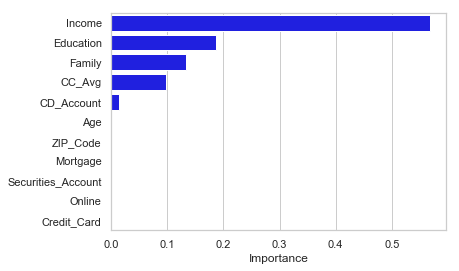

In [47]:
df_importance = pd.DataFrame(DT_model.feature_importances_, columns = ["Importance"], index = features).sort_values(by = "Importance", ascending=False)
sns.barplot(x = df_importance["Importance"], y = df_importance.index, orient='h', color = "blue")
df_importance.T

- Importance derived here can be used as a starting point for feature selection.

### Step 6 - Print the confusion matrix for all the above models.

In [48]:
# Logistic Regression
LR_cm =confusion_matrix(y_test, LR_y_predict_test, labels=[1, 0])
LR_df_cm = pd.DataFrame(LR_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# K-Nearest Neighbors
KNN_cm=confusion_matrix(y_test, KNN_y_predict_test, labels=[1, 0])
KNN_df_cm = pd.DataFrame(KNN_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# Naive Bayes
NB_cm=confusion_matrix(y_test, NB_y_predict_test, labels=[1, 0])
NB_df_cm = pd.DataFrame(NB_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])


# Support Vector Machine
SVM_cm=confusion_matrix(y_test, SVM_y_predict_test, labels=[1, 0])
SVM_df_cm = pd.DataFrame(SVM_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# DecisionTreeClassifier
DT_cm=confusion_matrix(y_test, DT_y_predict_test, labels=[1, 0])
DT_df_cm = pd.DataFrame(DT_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

Confusion Matrix for all the Models


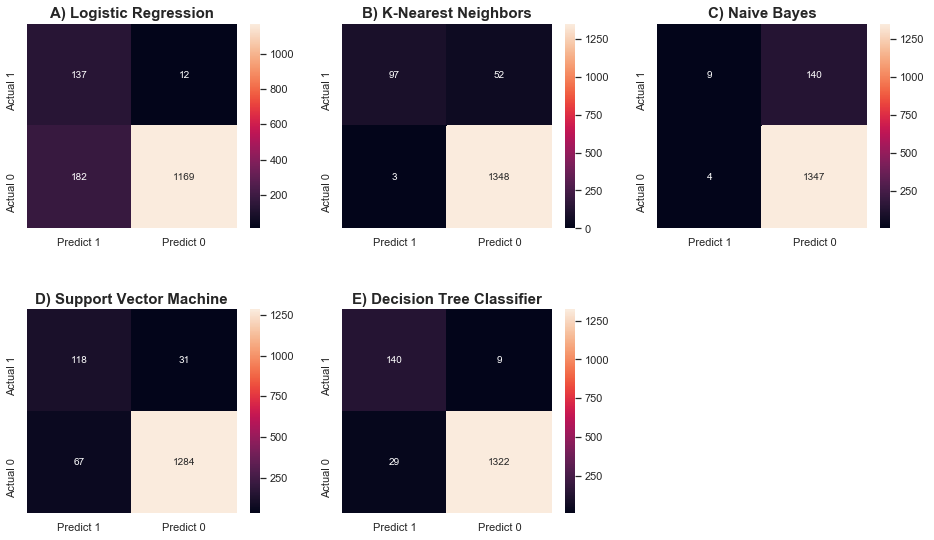

In [49]:
f, ax = plt.subplots(2, 3, figsize = (16,9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
sns.heatmap(LR_df_cm_t, annot=True, fmt = 'g', ax = ax[0,0])
ax[0,0].set_title("A) Logistic Regression", size = 15, weight = "bold")
sns.heatmap(KNN_df_cm, annot=True, fmt = 'g', ax = ax[0,1])
ax[0,1].set_title("B) K-Nearest Neighbors", size = 15, weight = "bold")
sns.heatmap(NB_df_cm, annot=True, fmt = 'g', ax = ax[0,2])
ax[0,2].set_title("C) Naive Bayes", size = 15, weight = "bold")
sns.heatmap(SVM_df_cm, annot=True, fmt = 'g', ax = ax[1,0])
ax[1,0].set_title("D) Support Vector Machine", size = 15, weight = "bold")
sns.heatmap(DT_df_cm, annot=True, fmt = 'g', ax = ax[1,1])
ax[1,1].set_title("E) Decision Tree Classifier", size = 15, weight = "bold")
ax[1,2].axis('off')
print("Confusion Matrix for all the Models")

- Decision Tree Classifier results appears to be on top with good TP of 140 & FN of 9 at 94% (Total positives 149).
- Naive Bayes results appears to be at the bottom with lowest TP of 9 & FN of 140 at 6% (Total positives 149).

### Step 7 - Give your reasoning on which is the best model in this case and why it performs better?

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

X_CV = scaler.fit_transform(X)
y_CV = np.array(y)

In [51]:
def scores(classifier, model):
    global df_Score, df_Score_mean
    df_Score = pd.DataFrame()
    scoring = ['accuracy', 'recall', 'precision']
    Scores = []
    Models = []
    Scoring = []
    for i in scoring:
        Score = []
        Model = []
        Scorer = []
        Score = cross_val_score(model, X_CV, y_CV.ravel(), cv = 10, n_jobs = -1, scoring = i)
        Model = classifier
        Scorer = i
        Mean = []
        for j in Score:
            Mean.append(j)
            Scores.append(j)
            Models.append(Model)
            Scoring.append(Scorer)
        df_Score_mean = df_Score_mean.append({'Model':Model, 'Metrics':Scorer, 'Mean':round(mean(Mean),3)}, ignore_index=True)      
    df_Score = df_Score.append(pd.DataFrame(list(zip(Models, Scoring, Scores)), columns =['Model', 'Metrics', 'Score']))
    return df_Score

In [52]:
from statistics import mean
classifiers = [('Log_Reg', LR_model), ('KNN', KNN_model), ('NB', NB_model), ('SVM', SVM_model), ('DT', DT_model)]
df_Scores = pd.DataFrame()
df_Score_mean = pd.DataFrame()
for p, q in classifiers:
    scores(p, q)
    df_Scores = df_Scores.append(df_Score)

In [53]:
Mean_Table = pd.pivot_table(df_Score_mean, index=['Metrics'], columns=['Model'])
Mean_Table = pd.DataFrame(Mean_Table.to_records())
Mean_Table.rename(columns = {"('Mean', 'DT')" : 'Decision Tree Classifier', "('Mean', 'KNN')" : 'K-Nearest Neighbours', "('Mean', 'Log_Reg')":'Logistic Regression', "('Mean', 'NB')" : 'Naive Bayes', "('Mean', 'SVM')":'Support Vector Machine'}, inplace=True) 
Mean_Table.set_index('Metrics', inplace = True)
column_order = ['Logistic Regression', 'K-Nearest Neighbours', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree Classifier']

*** Metrics Mean & Boxplots for all the models ***


Logistic Regression  K-Nearest Neighbours  Naive Bayes  \
Metrics                                                             
accuracy                 0.951                 0.964        0.883   
recall                   0.627                 0.656        0.579   
precision                0.819                 0.954        0.421   

           Support Vector Machine  Decision Tree Classifier  
Metrics                                                      
accuracy                    0.980                     0.985  
recall                      0.860                     0.885  
precision                   0.932                     0.957

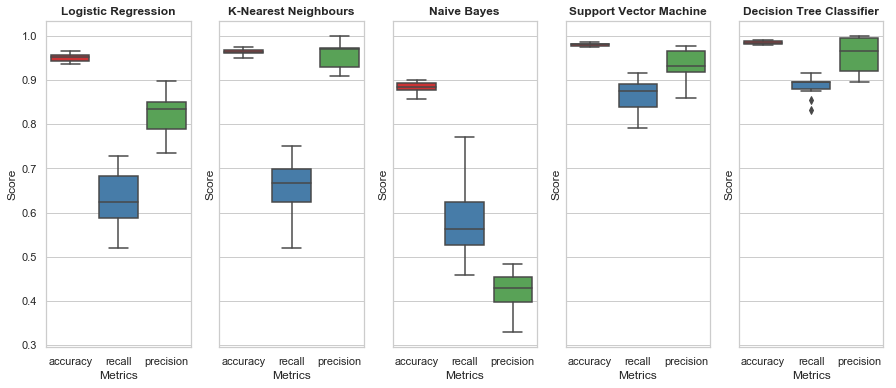

In [54]:
f, ax = plt.subplots(1, 5, sharey=True, figsize = (15,6))
ax[0].set_title("Logistic Regression", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'Log_Reg'], y = df_Scores.Score[df_Scores.Model == 'Log_Reg'], ax = ax[0])
ax[1].set_title("K-Nearest Neighbours", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'KNN'], y = df_Scores.Score[df_Scores.Model == 'KNN'], ax = ax[1])
ax[2].set_title("Naive Bayes", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'NB'], y = df_Scores.Score[df_Scores.Model == 'NB'], ax = ax[2])
ax[3].set_title("Support Vector Machine", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'SVM'], y = df_Scores.Score[df_Scores.Model == 'SVM'], ax = ax[3])
ax[4].set_title("Decision Tree Classifier", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'DT'], y = df_Scores.Score[df_Scores.Model == 'DT'], ax = ax[4])
print("*** Metrics Mean & Boxplots for all the models ***")
Mean_Table.reindex(columns = column_order, index = ['accuracy', 'recall', 'precision'])

#### Initial summary
- Boxplot of all 5 algorithms with accuracy, recall score and precision score using 10-fold cross validation.
- Mean of all the scores for each algorithm is also displayed in the table.
- Logistic Regression boxplot is shown here with 0.5 threshold.
- Overall Decision Tree Classifier appears to be giving the best results at this stage amoung all the three scores.
- K-Nearest Neighbors appear to be performing better if a model has to be selected between Logistic Regression, K-Nearest Neighbors and Naive Bayes.
- Still K-Nearest Neighbors out of sample mean recall score is only 0.656 after 10-fold cross validation.

#### Balancing class and feature selection
- Personal loan class 'False' is dominating in the dataset as mentioned earlier at 10:90 'True' to 'False' ratio.
- Hence optimising 'Training dataset' by balancing class, without any modification to 'Test dataset'.
- Also dropping some of the independent variables as per importance from 'Decision Tree' to see the impact on results.

In [55]:
df_NB = df.copy(deep=True)
df_NB.drop(columns= ['CC_Avg', 'CD_Account', 'Age', 'ZIP_Code', 'Mortgage', 'Securities_Account', 'Online', 'Credit_Card'], inplace=True)
drop_indices = df_NB[df_NB['Personal_Loan'] == 0].sample(frac=0.9, replace=False, random_state=1).index
df_NB.drop(drop_indices,inplace=True)
X_NB = df_NB.drop(['Personal_Loan'], axis=1)
y_NB = df_NB[['Personal_Loan']]
X_train_NB, X_test_ignore, y_train_NB, y_test_ignore = train_test_split(X_NB, y_NB, test_size=0.30, random_state=1)
X_train_NB = scaler.fit_transform(X_train_NB)
y_train_NB = np.array(y_train_NB)
X_test_NB = X_test_o.copy(deep=True)
X_test_NB.drop(columns= ['CC_Avg', 'CD_Account', 'Age', 'ZIP_Code', 'Mortgage', 'Securities_Account', 'Online', 'Credit_Card'], inplace=True)
X_test_NB = scaler.fit_transform(X_test_NB)
y_test_NB = y_test

In [56]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df_NB.loc[df_NB['Personal_Loan'] == 1]), (len(df_NB.loc[df_NB['Personal_Loan'] == 1])/len(df_NB.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(df_NB.loc[df_NB['Personal_Loan'] == 0]), (len(df_NB.loc[df_NB['Personal_Loan'] == 0])/len(df_NB.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train_NB[y_train_NB[:] == 1]), (len(y_train_NB[y_train_NB[:] == 1])/len(y_train_NB)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train_NB[y_train_NB[:] == 0]), (len(y_train_NB[y_train_NB[:] == 0])/len(y_train_NB)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test_NB[y_test_NB[:] == 1]), (len(y_test_NB[y_test_NB[:] == 1])/len(y_test_NB)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test_NB[y_test_NB[:] == 0]), (len(y_test_NB[y_test_NB[:] == 0])/len(y_test_NB)) * 100))
print("")

Original Target True Values    : 480 (51.50%)
Original Target False Values   : 452 (48.50%)

Training Target True Values    : 340 (52.15%)
Training Target False Values   : 312 (47.85%)

Test Target True Values        : 149 (9.93%)
Test Target False Values       : 1351 (90.07%)



- Training dataset target values balanced at a ratio of 50:50.
- Various ratios were tried before settling on this ratio, as it gave the best results within those ratios.
- Testing dataset has been left untouched at 10:90 to compare the out of sample results.

In [57]:
NB_model_o = GaussianNB()
NB_model_o.fit(X_train_NB, y_train_NB.ravel())

NB_y_predict_train_o = NB_model_o.predict(X_train_NB)
NB_y_predict_test_o = NB_model_o.predict(X_test_NB)

print("*** Naive Bayes ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train_NB, NB_y_predict_train_o)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test_NB, NB_y_predict_test_o)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train_NB, NB_y_predict_train_o)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test_NB, NB_y_predict_test_o)))
print(classification_report(y_test_NB, NB_y_predict_test_o, labels=[1, 0]))

*** Naive Bayes ***
Model Accuracy in-sample: 0.8773
Model Accuracy out of sample: 0.8727
Model Recall in-sample: 0.8882
Model Recall out of sample: 0.8389
              precision    recall  f1-score   support

           1       0.43      0.84      0.57       149
           0       0.98      0.88      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.70      0.86      0.75      1500
weighted avg       0.93      0.87      0.89      1500



- Naive Bayes out of sample recall score jumped from 0.0604 to 0.8389 with the same test dataset (1389% of previous score).
- Out of sample accuracy dropped from 0.9040 to 0.8727 (96.5% of previous score).

 A)  Accuracy Score:  0.904   | Recall Score:  0.0604  | Precision Score:  0.6923 
 B)  Accuracy Score:  0.8727  | Recall Score:  0.8389  | Precision Score:  0.4281


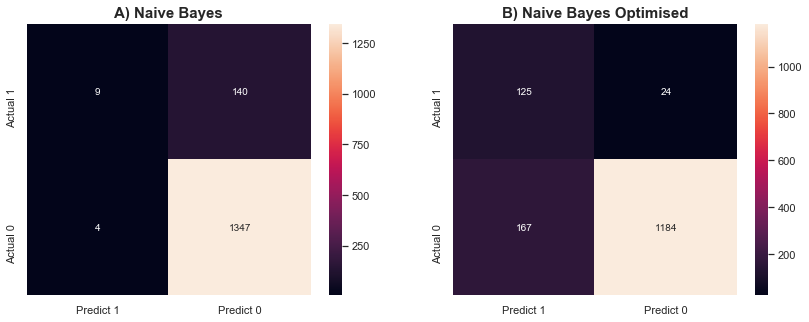

In [58]:
NB_cm=confusion_matrix(y_test, NB_y_predict_test, labels=[1, 0])
NB_df_cm = pd.DataFrame(NB_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

NB_cm_o=confusion_matrix(y_test_NB, NB_y_predict_test_o, labels=[1, 0])
NB_df_cm_o = pd.DataFrame(NB_cm_o, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

f, ax = plt.subplots(1, 2, figsize = (14,5))
sns.heatmap(NB_df_cm, annot=True, fmt = 'g', ax = ax[0])
ax[0].set_title("A) Naive Bayes", size = 15, weight = "bold")
sns.heatmap(NB_df_cm_o, annot=True, fmt = 'g', ax = ax[1])
ax[1].set_title("B) Naive Bayes Optimised", size = 15, weight = "bold")

print(" A) ", "Accuracy Score: ", round(accuracy_score(y_test, NB_y_predict_test), 4), "  | Recall Score: ", round(recall_score(y_test, NB_y_predict_test), 4), " | Precision Score: ", round(precision_score(y_test, NB_y_predict_test), 4), "\n",
"B) ", "Accuracy Score: ", round(accuracy_score(y_test_NB, NB_y_predict_test_o), 4), " | Recall Score: ", round(recall_score(y_test_NB, NB_y_predict_test_o), 4), " | Precision Score: ", round(precision_score(y_test_NB, NB_y_predict_test_o), 4))

- Dropping unimportant independent variables and balancing training target variables has improved out of sample recall score by around 14 times.
- Training other models also with the same training dataset to check the results using StratifiedKFold.

In [59]:
classifiers = [('KNN', KNN_model), ('NB', NB_model), ('SVM', SVM_model), ('DT', DT_model)] #('Log_Reg', LR_model)
skf_NB = StratifiedKFold(n_splits=10)
X_NB_CV = scaler.fit_transform(X_NB)
y_NB_CV = np.array(y_NB)
skf_NB.get_n_splits(X_NB_CV, y_NB_CV.ravel())
for classifier, model in classifiers:
    skf_acc, skf_rec, skf_pre = [], [], []
    acc, rec, pre = [], [], []
    classifier_skf = []
    Scoring_acc, Scoring_rec, Scoring_pre = [], [], []
    for train_index_NB, test_index_NB in skf_NB.split(X_NB_CV, y_NB_CV.ravel()):
        X_Train_NB, X_Test_NB = X_NB_CV[train_index_NB], X_NB_CV[test_index_NB]
        y_Train_NB, y_Test_NB = y_NB_CV[train_index_NB], y_NB_CV[test_index_NB]  
        model_skf = model
        model_skf.fit(X_Train_NB, y_Train_NB.ravel())
        predict_test_skf = (model_skf.predict(X_Test_NB))
        skf_acc.append(accuracy_score(y_Test_NB, predict_test_skf))
        skf_rec.append(recall_score(y_Test_NB, predict_test_skf))
        skf_pre.append(precision_score(y_Test_NB, predict_test_skf))
    i = -1
    for j in skf_acc:
        i += 1
        acc.append(skf_acc[i])
        Scoring_acc.append('accuracy_O')
        classifier_skf.append(classifier + '_O')
        rec.append(skf_rec[i])
        Scoring_rec.append('recall_O')
        pre.append(skf_pre[i])
        Scoring_pre.append('precision_O')
    df_Scores = df_Scores.append(pd.DataFrame(list(zip(classifier_skf, Scoring_acc, acc)), columns =['Model', 'Metrics', 'Score']))
    df_Scores = df_Scores.append(pd.DataFrame(list(zip(classifier_skf, Scoring_rec, rec)), columns =['Model', 'Metrics', 'Score']))
    df_Scores = df_Scores.append(pd.DataFrame(list(zip(classifier_skf, Scoring_pre, pre)), columns =['Model', 'Metrics', 'Score']))
    df_Score_mean = df_Score_mean.append({'Model':classifier, 'Metrics':'accuracy_O', 'Mean':round(mean(acc),3)}, ignore_index=True)      
    df_Score_mean = df_Score_mean.append({'Model':classifier, 'Metrics':'recall_O', 'Mean':round(mean(rec),3)}, ignore_index=True)      
    df_Score_mean = df_Score_mean.append({'Model':classifier, 'Metrics':'precision_O', 'Mean':round(mean(pre),3)}, ignore_index=True)

In [60]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X_CV, y_CV.ravel())
LR_model_skf_acc = []
LR_model_skf_rec = []
LR_model_skf_pre = []
for train_index, test_index in skf.split(X_CV, y_CV.ravel()):
#    print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_Test = X_CV[train_index], X_CV[test_index]
    y_Train, y_Test = y_CV[train_index], y_CV[test_index]
    
    LR_model_skf = LogisticRegression(solver = "saga", penalty = "elasticnet", l1_ratio = 1, n_jobs = -1)
    LR_model_skf.fit(X_Train, y_Train.ravel())
    LR_y_predict_test_skf = (LR_model_skf.predict_proba(X_Test)[:,1] >= Threshold)
    
    LR_model_skf_acc.append(accuracy_score(y_Test, LR_y_predict_test_skf))
    LR_model_skf_rec.append(recall_score(y_Test, LR_y_predict_test_skf))
    LR_model_skf_pre.append(precision_score(y_Test, LR_y_predict_test_skf))

In [61]:
scoring = ['accuracy_O', 'recall_O', 'precision_)']
Scores = []
Models = []
Scoring = []
Mean = []
for j in LR_model_skf_acc:
    Mean.append(j)
    Scores.append(j)
    Models.append('Log_Reg_O')
    Scoring.append('accuracy_O')
df_Score_mean = df_Score_mean.append({'Model':'Log_Reg', 'Metrics':'accuracy_O', 'Mean':round(mean(Mean),3)}, ignore_index=True)      
Mean = []
for j in LR_model_skf_rec:
    Mean.append(j)
    Scores.append(j)
    Models.append('Log_Reg_O')
    Scoring.append('recall_O')
df_Score_mean = df_Score_mean.append({'Model':'Log_Reg', 'Metrics':'recall_O', 'Mean':round(mean(Mean),3)}, ignore_index=True)      
Mean = []
for j in LR_model_skf_pre:
    Mean.append(j)
    Scores.append(j)
    Models.append('Log_Reg_O')
    Scoring.append('precision_O')
df_Score_mean = df_Score_mean.append({'Model':'Log_Reg', 'Metrics':'precision_O', 'Mean':round(mean(Mean),3)}, ignore_index=True)     
df_Scores = df_Scores.append(pd.DataFrame(list(zip(Models, Scoring, Scores)), columns =['Model', 'Metrics', 'Score']))

In [62]:
Mean_Table_O = pd.pivot_table(df_Score_mean, index=['Metrics'], columns=['Model'])
Mean_Table_O = pd.DataFrame(Mean_Table_O.to_records())
Mean_Table_O.rename(columns = {"('Mean', 'DT')" : 'Decision Tree Classifier', "('Mean', 'KNN')" : 'K-Nearest Neighbours', "('Mean', 'Log_Reg')":'Logistic Regression', "('Mean', 'NB')" : 'Naive Bayes', "('Mean', 'SVM')":'Support Vector Machine'}, inplace=True) 
Mean_Table_O.set_index('Metrics', inplace = True)
column_order = ['Logistic Regression', 'K-Nearest Neighbours', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree Classifier']

*** Metrics Mean & Boxplots for all the models with optimisied dataset***


Logistic Regression  K-Nearest Neighbours  Naive Bayes  \
Metrics                                                               
accuracy                   0.951                 0.964        0.883   
accuracy_O                 0.890                 0.918        0.879   
recall                     0.627                 0.656        0.579   
recall_O                   0.883                 0.912        0.894   
precision                  0.819                 0.954        0.421   
precision_O                0.464                 0.930        0.876   

             Support Vector Machine  Decision Tree Classifier  
Metrics                                                        
accuracy                      0.980                     0.985  
accuracy_O                    0.935                     0.921  
recall                        0.860                     0.885  
recall_O                      0.925                     0.929  
precision                     0.932                     0.957  
precision_O                   0.948                     0.920

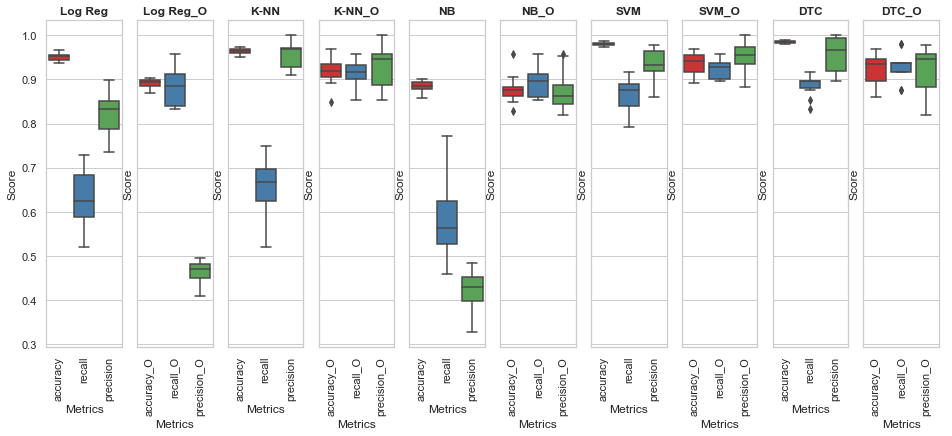

In [63]:
f, ax = plt.subplots(1, 10, sharey=True, figsize = (16,6))
ax[0].set_title("Log Reg", size = 12, weight = "bold")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'Log_Reg'], y = df_Scores.Score[df_Scores.Model == 'Log_Reg'], ax = ax[0])
ax[1].set_title("Log Reg_O", size = 12, weight = "bold")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'Log_Reg_O'], y = df_Scores.Score[df_Scores.Model == 'Log_Reg_O'], ax = ax[1])
ax[2].set_title("K-NN", size = 12, weight = "bold")
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'KNN'], y = df_Scores.Score[df_Scores.Model == 'KNN'], ax = ax[2])
ax[3].set_title("K-NN_O", size = 12, weight = "bold")
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=90)
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'KNN_O'], y = df_Scores.Score[df_Scores.Model == 'KNN_O'], ax = ax[3])
ax[4].set_title("NB", size = 12, weight = "bold")
ax[4].set_xticklabels(ax[4].get_xticklabels(), rotation=90)
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'NB'], y = df_Scores.Score[df_Scores.Model == 'NB'], ax = ax[4])
ax[5].set_title("NB_O", size = 12, weight = "bold")
ax[5].set_xticklabels(ax[5].get_xticklabels(), rotation=90)
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'NB_O'], y = df_Scores.Score[df_Scores.Model == 'NB_O'], ax = ax[5])
ax[6].set_title("SVM", size = 12, weight = "bold")
ax[6].set_xticklabels(ax[6].get_xticklabels(), rotation=90)
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'SVM'], y = df_Scores.Score[df_Scores.Model == 'SVM'], ax = ax[6])
ax[7].set_title("SVM_O", size = 12, weight = "bold")
ax[7].set_xticklabels(ax[7].get_xticklabels(), rotation=90)
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'SVM_O'], y = df_Scores.Score[df_Scores.Model == 'SVM_O'], ax = ax[7])
ax[8].set_title("DTC", size = 12, weight = "bold")
ax[8].set_xticklabels(ax[8].get_xticklabels(), rotation=90)
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'DT'], y = df_Scores.Score[df_Scores.Model == 'DT'], ax = ax[8])
ax[9].set_title("DTC_O", size = 12, weight = "bold")
ax[9].set_xticklabels(ax[9].get_xticklabels(), rotation=90)
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'DT_O'], y = df_Scores.Score[df_Scores.Model == 'DT_O'], ax = ax[9])

print("*** Metrics Mean & Boxplots for all the models with optimisied dataset***")
Mean_Table_O.reindex(columns = column_order, index = ['accuracy', 'accuracy_O', 'recall', 'recall_O', 'precision', 'precision_O'])

### Summary
- Boxplot of all 5 algorithms with accuracy, recall score and precision score using 10-fold cross validation along with optimised scores.
- Mean of all the scores for each algorithm is also displayed in the table.
- __Decision Tree Classifier__ or __SVM__ can be chosen as the first preference with out of sample recall score of __0.929__ and __0.925__.
- __Decision Tree Classifier__ has a slight advantage considering the variance of recall score.
- __K-Nearest Neighbours__ can be chosen as the next preference with out of sample recall score of __0.912__.
- K-Nearest Neighbours appear to be performing better if a model must be selected between Logistic Regression, K-Nearest Neighbours and Naive Bayes.
- Best performance can be achieved by training the model with balanced target values with only important independent variables